loss最小的迭代次数： 992
loss最小值： 0.2038280663
准确率最大的迭代次数： 30
准确率最大值： 0.8913043478260869


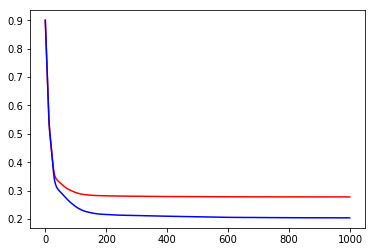

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 
x,y = load_svmlight_file("E:/australian_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones((m))
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
m_train,n_train= np.shape(X_train)
m_test,n_test= np.shape(X_test)
w = np.zeros(n+1)
W=w.transpose()
C=0.9
η = 0.04
epoch=1000
Iteration=range(0,epoch)
Ltrain=[]
Lvalidation=[]
accurancy=[]
def g(x,y,i):
    return 1-np.dot(y[i],np.dot(W.transpose(),x[i].transpose()))
for i in range(0,epoch):
    loss_train = np.dot(W.transpose(),W)/2
    for j in range(m_train):
        loss_train += C*max(0,g(X_train,y_train,j))
    loss_train /=m_train
    Ltrain.append(loss_train) 
    loss_test= np.dot(W.transpose(),W)/2
    for k in range(m_test):
        loss_test += C*max(0,g(X_test,y_test,k))
    loss_test /=m_test
    Lvalidation.append(loss_test)
    y_predict=np.dot(W.transpose(),X_test.transpose())
    y_predict[y_predict>=0]=1
    y_predict[y_predict<0]=-1 
    count=0
    for l in range(len(y_predict)):
        if y_predict[l]==y_test[l]:
            count +=1
    accurancy.append(count/m_test)
    gradient=0
    for m in range(m_train):
        if g(X_train,y_train,m)>=0:
            gradient -=C*np.dot(y_train[m], X_train[m].transpose())
    gradient +=W
    gradient /=m_train
    W -=η*gradient
print("loss最小的迭代次数：",Lvalidation.index(min(Lvalidation)))
print("loss最小值：",min(Lvalidation))
print("准确率最大的迭代次数：",accurancy.index(max(accurancy)))
print("准确率最大值：",max(accurancy))
plt.plot(Iteration,Ltrain,'r',label='Ltrain') 
plt.plot(Iteration, Lvalidation,'b',label='Lvalidation') 
plt.show()
